In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
from scipy import stats

# 統計モデルを推定するライブラリ
import statsmodels.api as sm
import statsmodels.tsa.api as tsa

# グラフを描画するライブラリ
from matplotlib import pylab as plt
import matplotlib.dates as mdates
import seaborn as sns

sns.set()

# 動的なグラフを描画するライブラリ
import plotly.express as px

# sktimeで状態空間モデルを推定する
from sktime.forecasting.structural import UnobservedComponents

# グラフの日本語表記
from matplotlib import rcParams

rcParams["font.family"] = "IPAexGothic"
rcParams["font.sans-serif"] = "Meiryo"

In [2]:
# 表示設定
np.set_printoptions(linewidth=60)
pd.set_option("display.width", 80)

from matplotlib.pylab import rcParams

rcParams["figure.figsize"] = 8, 4

In [3]:
# 日単位データの読み込み
sales_day = pd.read_csv(
    "5-6-1-daily-sales-data.csv", index_col="date", parse_dates=True, dtype="float"
)
sales_day.index.freq = "D"

# 結果の確認
print(sales_day.head(3))
print(sales_day.tail(3))

                 sales  flyer
date                         
2000-01-01  462.387217    0.0
2000-01-02  363.262237    0.0
2000-01-03  356.648654    0.0
                 sales  flyer
date                         
2001-06-27  243.739643    0.0
2001-06-28  205.223214    0.0
2001-06-29  192.051090    0.0


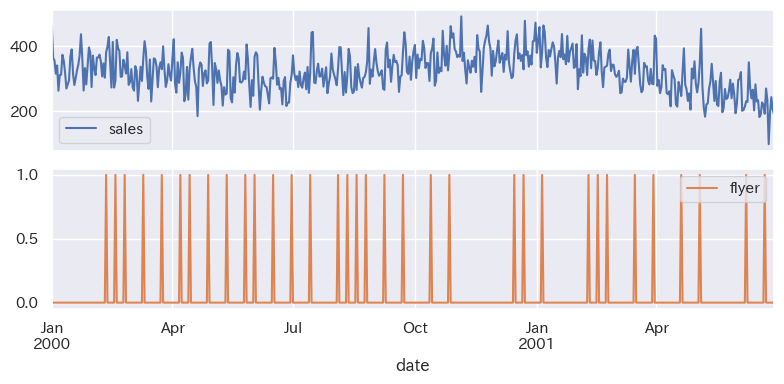

In [4]:
# 可視化
sales_day.plot(subplots=True)
plt.tight_layout()

In [5]:
# 参考：動的なグラフ
px.line(sales_day.sales)

In [6]:
# カレンダー情報を入れたデータ
sales_day_eda = sales_day.copy()

# 月
sales_day_eda["month"] = sales_day_eda.index.month

# 曜日
sales_day_eda["weekday"] = sales_day_eda.index.weekday

# 結果の確認
print(sales_day_eda.head(3))

                 sales  flyer  month  weekday
date                                         
2000-01-01  462.387217    0.0      1        5
2000-01-02  363.262237    0.0      1        6
2000-01-03  356.648654    0.0      1        0


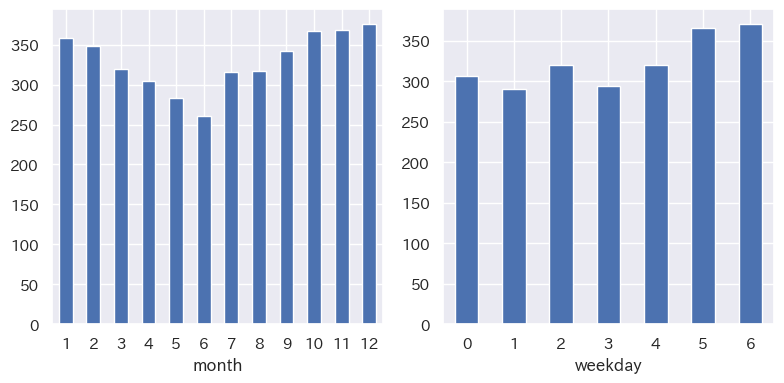

In [7]:
# 2列のグラフ
fig, ax = plt.subplots(ncols=2, tight_layout=True)

# 月ごとの売り上げ比較
sales_day_eda.groupby("month").mean()["sales"].plot(kind="bar", ax=ax[0])

# 曜日ごとの売り上げ比較
sales_day_eda.groupby("weekday").mean()["sales"].plot(kind="bar", ax=ax[1])

# X軸ラベルを回転させないようにする
ax[0].xaxis.set_tick_params(rotation=0)
ax[1].xaxis.set_tick_params(rotation=0)

In [8]:
# チラシの有無別売り上げ平均値
sales_day_eda.groupby("flyer").mean()["sales"]

flyer
0.0    324.384704
1.0    320.663946
Name: sales, dtype: float64

In [9]:
# ラグ特徴量の作成
# flyer_lag1: 1日前のチラシ配布（前日）
# flyer_lag2: 2日前のチラシ配布（前々日）
sales_day_eda["flyer_lag1"] = sales_day_eda["flyer"].shift(1).fillna(0)
sales_day_eda["flyer_lag2"] = sales_day_eda["flyer"].shift(2).fillna(0)

# 前日または前々日にチラシを配布した場合とそうでない場合で、
# 平均売上を比較する
print(sales_day_eda.groupby("flyer_lag1").mean()["sales"])
print(sales_day_eda.groupby("flyer_lag2").mean()["sales"])

flyer_lag1
0.0    319.717045
1.0    390.953406
Name: sales, dtype: float64
flyer_lag2
0.0    320.347595
1.0    381.458064
Name: sales, dtype: float64


In [10]:
# チラシをいつ配っているか
sales_day_eda.groupby("weekday").sum()["flyer"]

weekday
0     0.0
1     0.0
2     0.0
3     0.0
4    34.0
5     0.0
6     0.0
Name: flyer, dtype: float64